In [1]:
import torch, pickle, time, os, random
import numpy as np
import os.path as osp
import matplotlib.pyplot as plt
import torch_geometric as tg
from torch_geometric.loader import DataLoader
# accelerate huggingface to GPU
if torch.cuda.is_available():
    from accelerate import Accelerator
    accelerator = Accelerator()
    device = accelerator.device
from pysr import pysr, best
from tqdm import tqdm

In [2]:
datat=pickle.load(open(osp.expanduser(f'../train_loop/data.pkl'), 'rb'))

In [3]:
from torch_geometric.data import Data
data=[]
for d in datat:
    data.append(Data(x=d.x, edge_index=d.edge_index, edge_attr=d.edge_attr, y=d.y[0]))


In [8]:
xs=[]
ys=[]
ls=[]
for d in data[:10000]:
    xs.append(d.x.numpy()) #final only
    ys.append(d.y.numpy())
    ls.append(len(d.x.numpy()))
xs=np.vstack(xs)
# xs[:,40]=np.log10(xs[:,40])
ys=np.vstack(ys)
ls=np.array(ls)
splits=np.cumsum(ls)

100%|██████████| 43/43 [00:07<00:00,  5.40it/s]


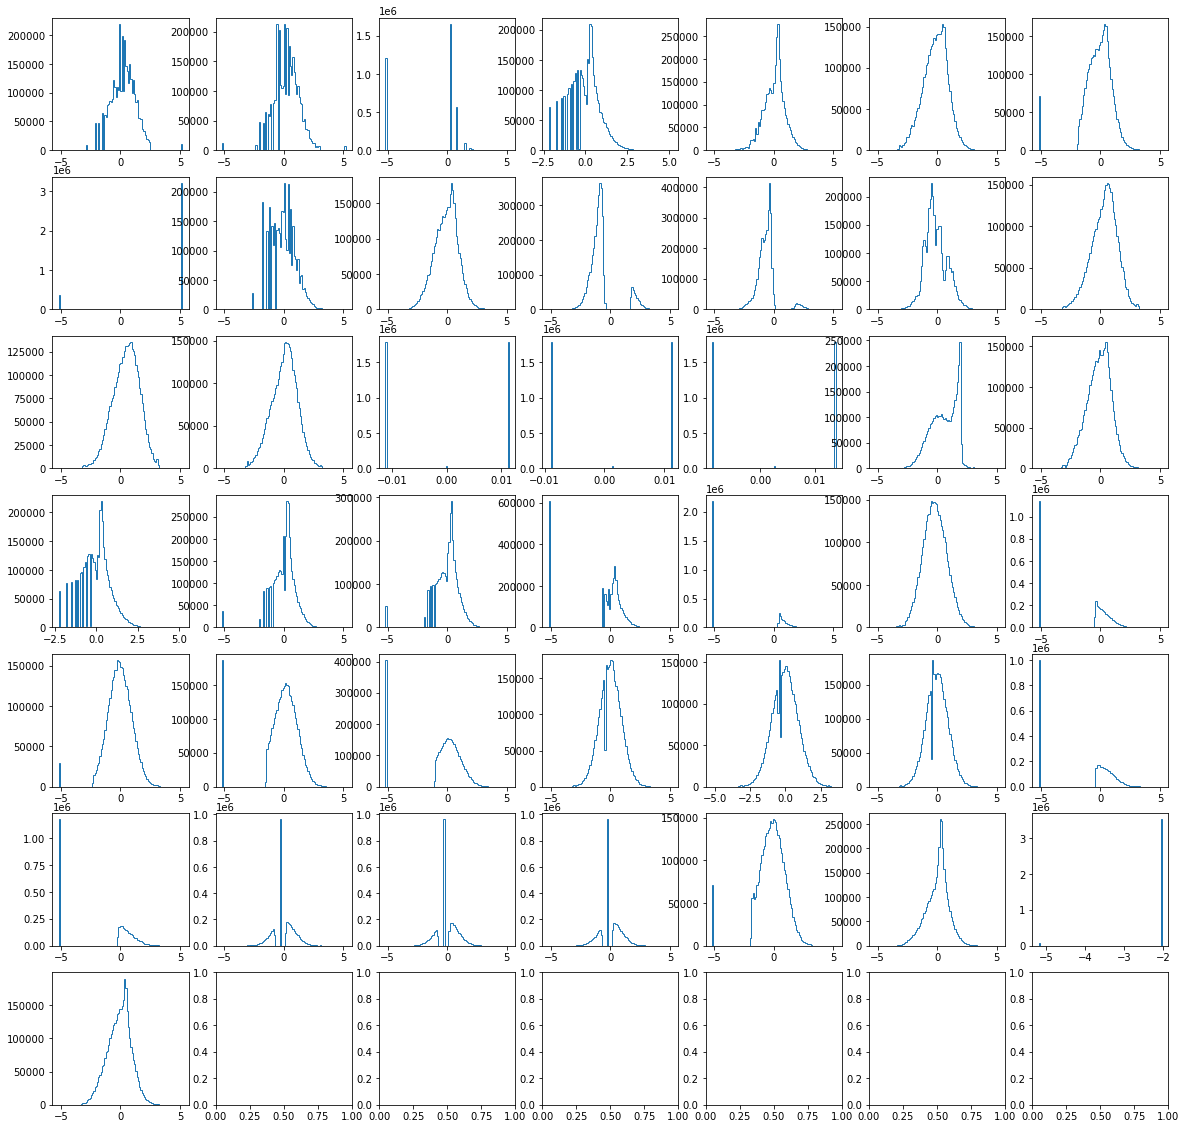

In [12]:
fig, ax = plt.subplots(7,7, figsize=(20,20))
ax = ax.flatten()
for i in tqdm(range(len(xs[0]))):
    ax[i].hist(xs[:,i], bins=100, histtype='step')

100%|██████████| 4/4 [00:00<00:00, 564.22it/s]


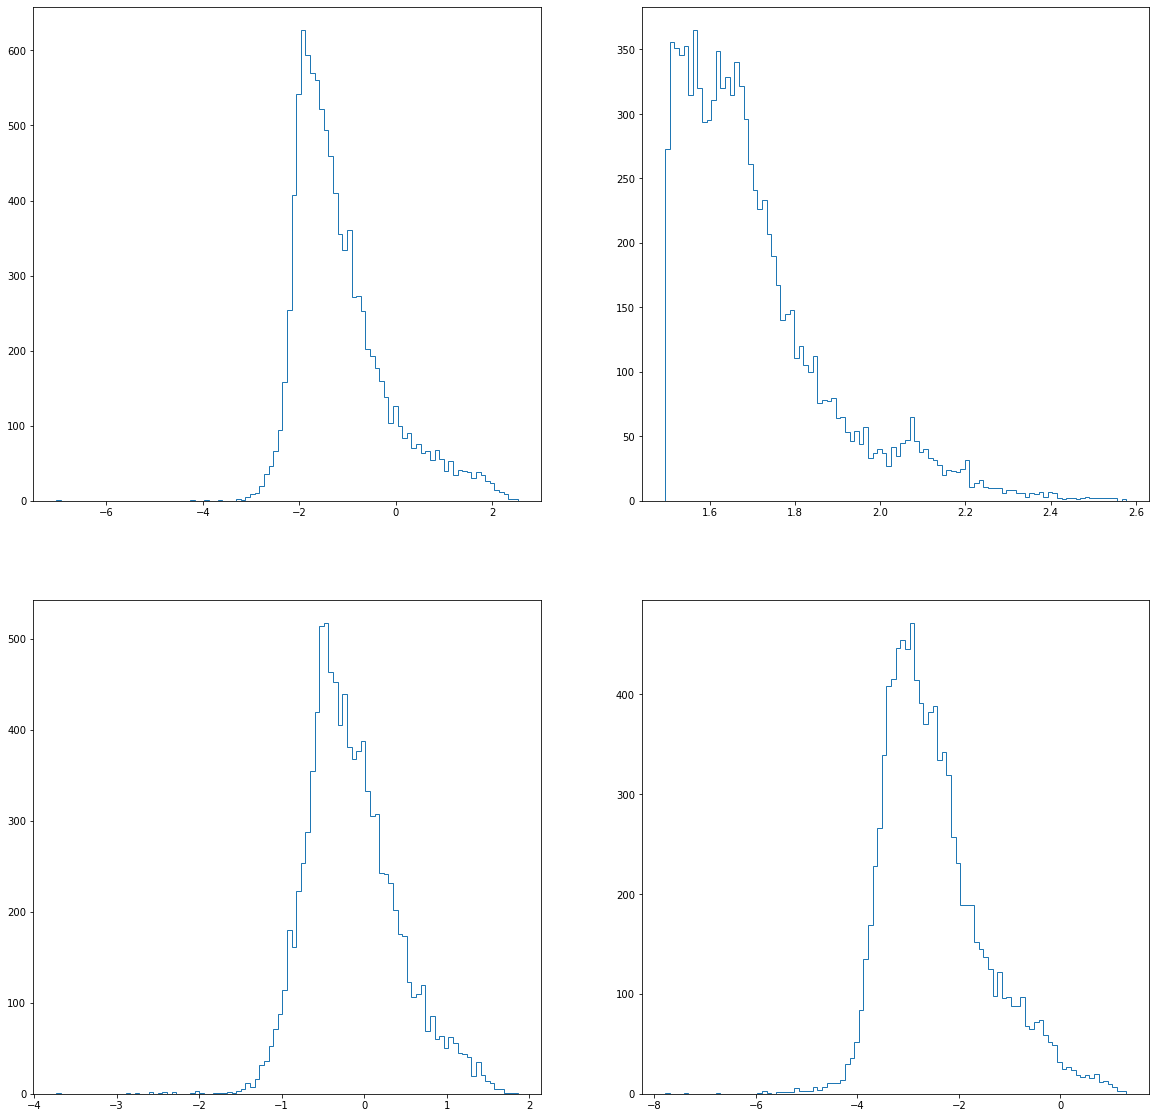

In [13]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
ax = ax.flatten()
for i in tqdm(range(len(ys[0]))):
    ax[i].hist(ys[:,i], bins=100, histtype='step')